In [81]:
# Importing all required libraries
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd


In [82]:
# loading the extension
%load_ext sql

# initializing the connection to existing database.
%sql sqlite:///stores.db
conn = sqlite3.connect('stores.db')

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [83]:
%sql SELECT name FROM sqlite_master WHERE type='table';

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


name
customers
employees
offices
orderdetails
orders
payments
productlines
products


In [84]:
%%sql
SELECT *
FROM customers LIMIT 5;


   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166,71800
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370,118200
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700


In [85]:
%%sql
WITH grouped_data AS (
    SELECT 
        CASE 
            WHEN COUNT(customerNumber) = 1 THEN 'others'
            ELSE country
        END as country_group,
        COUNT(customerNumber) as customers
    FROM customers c 
    GROUP BY TRIM(country)
)

-- Второй запрос: считаем сумму клиентов для группы "others"
SELECT 
    country_group,
    SUM(customers) as total_customers
FROM grouped_data
GROUP BY country_group
ORDER BY 
    CASE WHEN country_group = 'others' THEN 1 ELSE 0 END, -- Сначала выводим группу "others" в конце
    total_customers DESC;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


country_group,total_customers
USA,36
Germany,13
France,12
Spain,7
Australia,5
UK,5
Italy,4
New Zealand,4
Canada,3
Finland,3


In [86]:
%%sql 
SELECT 'customers' table_name, count(*) number_of_attributes,(SELECT count(*)FROM customers ) number_of_rows FROM pragma_table_info('customers')
UNION ALL
SELECT 'products' table_name, count(*) number_of_attributes,(SELECT count(*)FROM products ) number_of_rows FROM pragma_table_info('products')
UNION ALL
SELECT 'productlines' table_name, count(*) number_of_attributes,(SELECT count(*)FROM productlines ) number_of_rows FROM pragma_table_info('productlines')
UNION ALL
SELECT 'orders' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orders ) number_of_rows FROM pragma_table_info('orders')
UNION ALL
SELECT 'orderdetails' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orderdetails ) number_of_rows FROM pragma_table_info('orderdetails')
UNION ALL
SELECT 'payments' table_name, count(*) number_of_attributes,(SELECT count(*)FROM payments ) number_of_rows FROM pragma_table_info('payments')
UNION ALL
SELECT 'employees' table_name, count(*) number_of_attributes,(SELECT count(*)FROM employees ) number_of_rows FROM pragma_table_info('employees')
UNION ALL
SELECT 'offices' table_name, count(*) number_of_attributes,(SELECT count(*)FROM offices ) number_of_rows FROM pragma_table_info('offices');




   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


table_name,number_of_attributes,number_of_rows
customers,13,122
products,9,110
productlines,4,7
orders,7,326
orderdetails,5,2996
payments,4,273
employees,8,23
offices,9,7


In [87]:
# Compute the top 10 low stock for each product 

In [88]:
%%sql
SELECT p.productCode ,p.productName ,sum(o.quantityOrdered)/p.quantityInStock as low_stock
FROM products p 
JOIN orderdetails o ON p.productCode = o.productCode 
GROUP BY p.productCode 
ORDER BY low_stock DESC 
LIMIT 10;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


productCode,productName,low_stock
S24_2000,1960 BSA Gold Star DBD34,67
S12_1099,1968 Ford Mustang,13
S32_4289,1928 Ford Phaeton Deluxe,7
S32_1374,1997 BMW F650 ST,5
S72_3212,Pont Yacht,2
S700_3167,F/A 18 Hornet 1/72,1
S700_1938,The Mayflower,1
S50_4713,2002 Yamaha YZR M1,1
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,1
S18_2795,1928 Mercedes-Benz SSK,1


In [89]:
# Compute the top 10 product performance for each product

In [90]:
%%sql
SELECT p.productCode ,p.productName, round(sum(o.quantityOrdered*o.priceEach),2) as product_performance
FROM orderdetails o 
JOIN products p ON p.productCode = o.productCode 
GROUP BY p.productCode 
ORDER BY product_performance DESC 
LIMIT 10;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


productCode,productName,product_performance
S18_3232,1992 Ferrari 360 Spider red,276839.98
S12_1108,2001 Ferrari Enzo,190755.86
S10_1949,1952 Alpine Renault 1300,190017.96
S10_4698,2003 Harley-Davidson Eagle Drag Bike,170686.0
S12_1099,1968 Ford Mustang,161531.48
S12_3891,1969 Ford Falcon,152543.02
S18_1662,1980s Black Hawk Helicopter,144959.91
S18_2238,1998 Chrysler Plymouth Prowler,142530.63
S18_1749,1917 Grand Touring Sedan,140535.6
S12_2823,2002 Suzuki XREO,135767.03


In [91]:
# Compute how much profit each customer generates

In [92]:
%%sql
SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


customerNumber,profit
141,326519.66
124,236769.39
151,72370.09
114,70311.07
119,60875.3
148,60477.38
187,60095.86
323,60013.99
131,58669.1
450,55931.37


In [93]:
# Find the top five VIP customers

In [94]:
%%sql
WITH performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC)
SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, profit
FROM customers c 
JOIN performance ON performance.customerNumber = c.customerNumber 
LIMIT 5;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


name,city,country,profit
Freyre Diego,Madrid,Spain,326519.66
Nelson Susan,San Rafael,USA,236769.39
Young Jeff,NYC,USA,72370.09
Ferguson Peter,Melbourne,Australia,70311.07
Labrune Janine,Nantes,France,60875.3


In [95]:
# Compute the average of customer profits

In [96]:
%%sql
WITH  performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit)
SELECT  round(avg(profit),2) as LTV
FROM performance;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


LTV
39039.59


In [97]:
#Question 4: For optimal returns, which countries should be the focus of our marketing efforts?

In [98]:
%%sql
SELECT c.country , round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY c.country 
ORDER BY profit DESC
LIMIT 5;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


country,profit
USA,1308815.59
Spain,440004.54
France,413016.12
Australia,222207.18
New Zealand,189506.58


In [99]:
#Question 5: Determine the most and least favorable categories for each country

In [100]:
%%sql
WITH 
best_category AS 
(SELECT country, productLine, max(profit) as max_profit
FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY TRIM(c.country) ,p.productLine
ORDER BY profit DESC)
GROUP BY TRIM(country)
ORDER BY max_profit DESC),
worst_category AS 
(SELECT country, productLine, min(profit) as min_profit
FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY TRIM(c.country) ,p.productLine
ORDER BY profit DESC)
GROUP BY TRIM(country)
ORDER BY min_profit DESC)
SELECT best_category.country as Country,best_category.productLine as Best_Category, 
best_category.max_profit as Max_Profit,worst_category.productLine as Worst_Category, 
worst_category.min_profit as Min_Profit
FROM best_category
JOIN worst_category ON best_category.country = worst_category.country
GROUP BY best_category.country,best_category.productLine;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


Country,Best_Category,Max_Profit,Worst_Category,Min_Profit
Australia,Classic Cars,71331.4,Trains,1004.85
Austria,Classic Cars,37725.09,Ships,3332.43
Belgium,Vintage Cars,15374.27,Trains,2364.48
Canada,Classic Cars,25081.93,Motorcycles,983.18
Denmark,Classic Cars,55211.95,Trains,2759.88
Finland,Classic Cars,55937.56,Trains,1956.54
France,Classic Cars,164755.55,Trains,5670.23
Germany,Classic Cars,51386.03,Trucks and Buses,1670.64
Hong Kong,Planes,14113.27,Motorcycles,489.65
Ireland,Classic Cars,10418.83,Vintage Cars,847.56


In [101]:
#Question 6: What was the sales performance throughout the entire duration when sales were recorded?

In [102]:
%%sql
WITH order_shipped AS
(SELECT p.customerNumber , strftime('%Y-%m', p.paymentDate) as year_month, p.amount
FROM payments p 
JOIN orders o ON o.customerNumber =p.customerNumber 
WHERE status = "Shipped"
ORDER BY year_month)
SELECT year_month, round(sum(amount),2)as total
FROM order_shipped osh
JOIN customers c ON c.customerNumber = osh.customerNumber
GROUP BY year_month
ORDER BY year_month;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


year_month,total
2003-01,89351.87
2003-02,1247289.83
2003-03,599113.44
2003-04,642905.52
2003-05,655731.4
2003-06,599498.29
2003-07,1197111.09
2003-08,2229925.11
2003-09,444833.59
2003-10,1777878.91


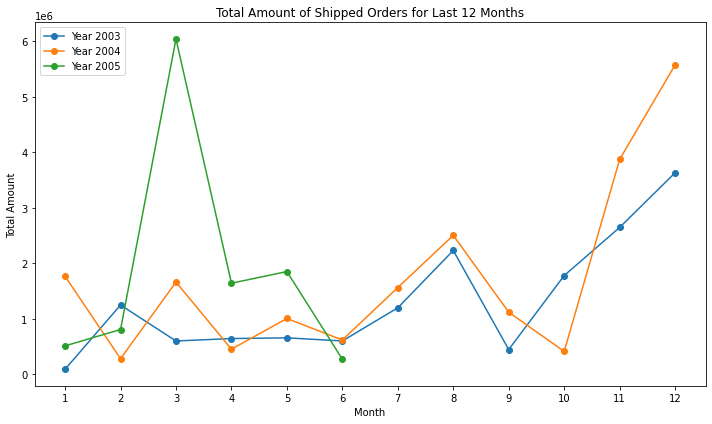

In [116]:
dataset = pd.read_sql_query("""WITH order_shipped AS
(SELECT p.customerNumber , strftime('%Y-%m', p.paymentDate) as year_month, p.amount
FROM payments p 
JOIN orders o ON o.customerNumber =p.customerNumber 
WHERE status = "Shipped"
ORDER BY year_month)
SELECT year_month, round(sum(amount),2)as total
FROM order_shipped osh
JOIN customers c ON c.customerNumber = osh.customerNumber
GROUP BY year_month
ORDER BY year_month;""", conn)


dataset['year_month'] = pd.to_datetime(dataset['year_month'])

# Создаем DataFrame с отдельными столбцами для года и месяца
dataset['year'] = dataset['year_month'].dt.year
dataset['month'] = dataset['year_month'].dt.month

# Группируем данные по месяцам и годам для каждого года
grouped_data = dataset.groupby(['year', 'month'])

# Получаем последние 12 месяцев для каждого года
last_12_months = grouped_data.tail(12)

# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение линий для каждого года
for year, data in last_12_months.groupby('year'):
    ax.plot(data['month'], data['total'], label=f'Year {year}', marker='o')

# Настройки для графика
ax.set_xlabel('Month')
ax.set_ylabel('Total Amount')
ax.set_title('Total Amount of Shipped Orders for Last 12 Months')
ax.legend()

# На оси X устанавливаем метки для каждого месяца (1-12)
ax.set_xticks(range(1, 13))

# Отображение графика
plt.tight_layout()
plt.show()

In [104]:
#Question 7: Evaluate the performance of our current sales team

In [105]:
%%sql           
WITH best_employee AS 
(SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber 
JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
GROUP BY e.employeeNumber 
ORDER BY c.city,profit DESC)
SELECT lastName ||" "|| firstName as name ,jobTitle, city, country, productLine, profit
FROM best_employee
ORDER BY country;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


name,jobTitle,city,country,productLine,profit
Fixter Andy,Sales Rep,Melbourne,Australia,Motorcycles,222207.18
Castillo Pamela,Sales Rep,Kobenhavn,Denmark,Classic Cars,340727.9
Bondur Loui,Sales Rep,Paris,France,Classic Cars,234891.07
Jones Barry,Sales Rep,Frankfurt,Germany,Vintage Cars,276659.25
Marsh Peter,Sales Rep,Auckland,New Zealand,Planes,230811.75
Nishi Mami,Sales Rep,Makati City,Philippines,Classic Cars,181181.8
Gerard Martin,Sales Rep,Barcelona,Spain,Ships,156878.63
Hernandez Gerard,Sales Rep,Madrid,Spain,Classic Cars,504644.71
Bott Larry,Sales Rep,Manchester,UK,Classic Cars,290203.59
Thompson Leslie,Sales Rep,Las Vegas,USA,Vintage Cars,138031.47


In [106]:
#Question 9: Provide a list of top spenders from each country

In [107]:
%%sql
WITH  performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC)
SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, max(profit) as max_money_spent
FROM customers c 
JOIN performance ON performance.customerNumber = c.customerNumber 
GROUP BY c.country
ORDER BY  c.country;

   sqlite:///D:/data_science/project/sqlite_project/stories.db
 * sqlite:///stores.db
Done.


name,city,country,max_money_spent
Ferguson Peter,Melbourne,Australia,70311.07
Pipps Georg,Salzburg,Austria,54724.68
Dewey Catherine,Bruxelles,Belgium,25861.96
Tamuri Yoshi,Vancouver,Canada,28882.99
Petersen Jytte,Kobenhavn,Denmark,50973.68
Suominen Kalle,Espoo,Finland,40095.85
Labrune Janine,Nantes,France,60875.3
Pfalzheim Henriette,Köln,Germany,36744.01
Gao Mike,Central Hong Kong,Hong Kong,16868.68
Cassidy Dean,Dublin,Ireland,19588.29
